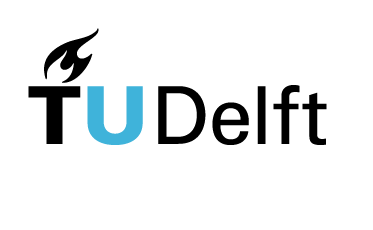

<h1 style="text-align:center"> Lab Assignment 2023/2024</h1>

<h2><p>Faculty of Electrical Engineering, Mathematics, and Computer Science<br>
Mathematical Methods For Physics: Finite-Element Analysis (AP3001-FE)</p></h2>

Author:
  - Carolina Urzúa Torres
  - Artur Palha (minor updates)
    
Jupyter Notebook: 
  - Carolina Urzúa Torres 
  - Dani Balagué Guardia
  - Artur Palha
  
## <span style="color:red">DEADLINE</span> 
To be submitted **before 17:00 of January 16th, 2024**, via Brightspace, both the report (pdf) and code (ipynb).

The lab project is planned so you are able to complete all tasks before this date. Nevertheless, if your group encounters some last minute problems, there is also the **possibility to hand in your lab report before 17:00 of February 2nd, 2024** (no explanations needed). Please note that this is a **hard deadline no further extensions will be granted**.

## Typesetting
The report must be typeset in either $\LaTeX$ or Word and converted to a pdf file.

## Problem Statement

We are interested in the evolution of the temperature distribution in a student's 
room, which is modeled via the *heat equation*

\begin{equation}
 \dfrac{\partial u(\mathbf{x},t)}{\partial t} = \nabla\cdot(\mathbf{k}(\mathbf{x}) 
 \nabla u(\mathbf{x},t)) + f(\mathbf{x},t) \qquad \text{ in } \Omega,
\end{equation}

where $\Omega = (0, 1)^{2}$ (see Figure 1) is the room under consideration, $\mathbf{x}=(x,y) \in \Omega$ are the coordinates of a point inside the room, and $f(\mathbf{x},t)$ is our given heat source, namely the heaters.

Considering the current high energy prices, we would like to understand more about the importance of wall insulation and how the temperature distribution is affected not only by the presence of heaters, but also by their location.

For simplicity, we will neglect the furniture in the room and consider the tensor $\mathbf{k}(\mathbf{x})$ to be the identity matrix. This means that $\nabla\cdot(\mathbf{k}(\mathbf{x}) \nabla u(\mathbf{x},t))$ reduces to $\nabla\cdot\nabla u$.

We will also consider the case where the heating source is constant in time, i.e. $f(\boldsymbol{x}, t) = f(\boldsymbol{x})$. This corresponds to a heater that outputs a constant heat in time. If we leave it on for a long time, $t\to\infty$, the solution eventually reaches a steady state, i.e. the temperature inside the room no longer changes in time. In this limit regime $t\to\infty$:

$$
 \dfrac{\partial u(\mathbf{x},t)}{\partial t} \to 0, \text{ as } t \to \infty
$$

and the stationary temperature inside the room is governed by what is called the *steady heat equation*, a Poisson equation

\begin{equation}
-\nabla\cdot\nabla u(\mathbf{x})= f(\mathbf{x}) \quad \text{ in } \Omega\,, \label{eq:PDE2}
\end{equation}

which is what we will consider for this lab assignment.

<div style="text-align:center; font-size:20px;">
<img src="./boundary_domain.png" style="width:500px"><br>
<strong>Figure 1. </strong> Boundary splitting.
</div>

As Figure 1 shows, the room's layout is a square with one entrance door, $\Gamma_1$, and one 
window, $\Gamma_3$. Hence, the boundary of the room $\partial \Omega$ can be 
decomposed into three parts: the door ($\Gamma_1$), the walls ($\Gamma_2$), 
and the window ($\Gamma_3$). Let us describe the different boundary conditions 
that we will impose on each of them.
The entrance door is connected to a hallway, which is regularly kept at a certain 
constant temperature $g_1$, so we describe it as a Dirichlet boundary condition
\begin{equation}
\label{eq:bc1}
 u = g_1 \qquad \text{ on } \Gamma_1.
\end{equation}

We assume that the walls are perfectly insulated. This means, 
there is no heat flux:
\begin{equation}
\label{eq:bc2}
 \nabla u \cdot \mathbf{n} = 0 \qquad \text{ on } \Gamma_2.
\end{equation}

Last but not least, since window insulation is still very modest in many old 
students houses, we assume that the temperature at the window equals the outside 
environment temperature $g_3$:
\begin{equation}
\label{eq:bc3}
 u = g_3 \qquad \text{ on } \Gamma_3.
\end{equation}


Since $\Omega=(0,1)^2$, we have that <b><span style="color:red">$\Gamma_1 = \lbrace (x,1)\in \mathbb{R}^2 \text{ with }
0.8 \leq x \leq 1 \rbrace$</span></b>, and <b><span style="color:green">$\Gamma_3 = \lbrace (x,0)\in \mathbb{R}^2 \text{ with }
0.2 \leq x \leq 0.4 \rbrace$</span></b>.


<hr style="border: 15px solid #00A6D6;border-radius: 10px">

<h2 style="text-align:center"> Assignment - PART 1</h2>
<p style="text-align:center">(To be answered on paper and submitted through Brightspace)</p>
<br>
<ol>
<li>Derive the weak formulation for the PDE \eqref{eq:PDE2} with boundary 
 conditions \eqref{eq:bc1}, \eqref{eq:bc2} and \eqref{eq:bc3}.
 <br><br>
 Do not forget to specify the required function space(s).</li>
</ol>

<hr style="border: 2px solid #00A6D6;border-radius: 10px">

<ol start="2">
    <li> Following the steps discussed in the lectures, write down the Galerkin 
    discretization corresponding to the weak formulation found in Question 1). 
    <br>
    Specify the size of the linear system and the entries of the resulting matrices 
    and vectors.
    <br><br>
    <b>Hint:</b> Do not forget the non-homogeneous Dirichlet boundary 
    condition. For this, first enumerate the basis functions related to 
    internal vertices and then the ones for vertices located on the boundary. You 
    may use index sets for each boundary, as introduced in the lectures.</li>
</ol>

<hr style="border: 2px solid #00A6D6;border-radius: 10px">

<ol start="3">
    <li> Using  your results from Question 2), compute the element matrix the element vector $f^{e_k}$ for a triangle $e_k$ and a generic function $f$. </li>
</ol>

<hr style="border: 2px solid #00A6D6;border-radius: 10px">

<h2 style="text-align:center"> Assignment - PART 2</h2>
<p>(To be answered directly in this file and submitted via Brightspace, together with the pdf file of the report)</p>
<br><br>
Now we turn to the implementation part of the lab assignment. Run the code below until you reach the first question.

In [ ]:
# If we are in google colab we need to do some extra things to have access to
# the dependencies
try:
  import google.colab
  IN_COLAB = True

  # We are in google colab

  # Mount your google drive in google colab
  from google.colab import drive
  drive.mount('/content/drive')

  # Check your Colab temporary path
  !pwd # Returns /content

  # Copy custom module from Google Drive to Colab temporary drive
  # !cp [path of your custom module] [path where you like to copy]
  ! cp -r /content/drive/MyDrive/AP3001_FE/Lab_assignment/ /content/
  ! ls /content/Lab_assignment/

  # Install dependencies
  ! pip3 install scikit-fem[all]

except:
  # We are not in google colab
  IN_COLAB = False

In [ ]:
#%matplotlib notebook
# Import the libraries needed in order to run the code
import sys
sys.path.append('.resources')

if IN_COLAB:
  # In colab we need to add the dependencies to the search path
  sys.path.append('/content/Lab_assignment')

from mesh import *
from tests_lab2 import *
import numpy as np
from scipy.sparse import lil_matrix as sparse_matrix
from scipy.sparse.linalg import spsolve as solve

# Create the mesh
squareMesh = Mesh('square',None,refinement=5)

# Get the elements: returns an array with the coordinate index of the vertices
element_list = squareMesh.topology_elements

# Returns the list of vertices
p = squareMesh.points.T

# Compute the number of vertices
n = len(p)

ax = squareMesh.draw()

In [ ]:
def generate_element_matrix(points, element):
    
    """ Computes the element matrix for a given element.
    This function is  just for test purposes.

    Intputs:
        + points: list of points (NumPy Array)
        + element: list of indices of points that define the element for which we are constructing the element matrix (NumPy Vector with size equal to topology)

    Output:
        + delta (scalar): the double of the element area
        + L_mat: Numpy array (matrix) containing the local element matrix. """
    
    topology = 3 # we consider triangles, which have three vertices
    delta_matrix = np.array([[1, points[element[j],0], points[element[j],1]] for j in range(topology)], dtype='float32')
    delta = np.linalg.det(delta_matrix)
    
    B_mat = np.linalg.solve(delta_matrix,np.eye(topology))
    
    idx = np.array(range(topology))
    ii,jj =np.meshgrid(idx,idx,indexing='ij')
    
    L_mat = (np.abs(delta)/2.)*(B_mat[1,ii]*B_mat[1,jj]+B_mat[2,ii]*B_mat[2,jj])
    
    return delta, L_mat


# Evaluates the boundary function 'func' at the corresponding point.
def compute_boundary_contribution_value(func,p,node):
    
    return func(p[node])

<ol start="4">
    <li> Complete the provided ```Python``` implementation by modifying the cell below so it computes the element vector $f^{e_k}$ derived in Question 3.</li>
<ol>


In [ ]:
# INSTRUCTIONS: the return value of the function should be a NumPy array of size (topology x 1)
# with type 'float32'. In this case we are working with triangles, so topology = 3.
# If you have trouble with the size, try reshaping the array!

def generate_element_vector(points, element, delta, func):
    
    """ Generates the local element vector
        This functions is just for test purposes
        
        Inputs:
            - points: list of points (NumPy Array)
            - element: the element for which we are constructing the local matrix
            - delta: delta value computed when generating the local matrix (double of element area)
            - func: Function for the right-hand side of the PDE.
            
        Outputs:
            - L_f_vec: local element vector (NumPy Array)
    """
    
    ### BEGIN SOLUTION
    
    # Comment the random values below and add your code 
    L_f_vec = np.random.rand(3, 1)
    
    
    ### END SOLUTION
    
    return L_f_vec

Run the test below! Beware that these tests are not thorough. They just check the shape of the matrix and vector.

In [ ]:
test_element_vector(generate_element_matrix,generate_element_vector,p,element_list)

<hr style="border: 2px solid #00A6D6;border-radius: 10px">

5. The routine ```construc_system``` below imposes Dirichlet boundary conditions $u=g_{all}$ on $\partial \Omega$. Modify this routine such that it imposes the required Dirichlet boundary conditions on $\Gamma_1$ and $\Gamma_3$.

  **Hint:** You can check your implementation by setting $f=0$, $g_1=g_3=20$. If then you obtain a numerical solution $u$ that is approximately 20 everywhere in your room, you know your system matrix implementation is correct. You can still have some problems with your right hand side.


In [ ]:
def construct_system(p,element_list,func,g1,g3,n):
    
    """ Constructs stiffness matrix. For test purposes only.
        Inputs: 
            p - NumPy array with the points
            element_list - NumPy array with the elements
            func - Function that takes as input point and returns the right-hand side of -Delta u = f
            g1 - Function that takes as input a point and returns boundary condition over \gamma_{1}
            g3 - Function that takes as input a point and returns boundary condition over \gamma_{3}
            n - the total nomber of nodes

        Outputs:
            S_mat, f_vec - SciPy sparse matrices corresponding to the stiffness matrix 
                           and the corresponding right-hand side vector
    """
    
    topology = 3  # we are focusing on triangles, so the number of points is 3
    
    # First initialisation of large discretisation matrix, right-hand side vector
    
    S_mat = sparse_matrix((n,n), dtype='float32')
    f_vec = sparse_matrix((n,1), dtype='float32')

    # First:
    # Contributions of the elements
    
    for element in element_list:
        ### BEGIN SOLUTION
        
        # Add code here ...
        
        S_mat[ii,jj] += # add the element matrix

        f_vec[element] += # add the element vector
        
        ### END SOLUTION


    # Second:
    # Contributions of the boundary in the right hand side vector

    bnd_edges = squareMesh.topology_edges[squareMesh.boundary_edges]  

    ### BEGIN SOLUTION
    
    # Modify the code here so that it takes into account the new
    # Dirichlet boundary conditions
    
    # Boundary conditions for g_{all}
    for node in np.unique(bnd_edges.flatten()):
        # Entrance door
        if (p[node][0]>=0.8 and p[node][1]>=1-10**(-5)):
            g_bnd_vec = # Compute the Dirichlet boundary condition for the entrance door value at the point p[node]
            f_vec[node] = # Add the Dirichlet boundary condition value to the right hand side...
            
            # Adjust the boundary contributions to the matrix
            S_mat[node,:] = 0.0
            S_mat[node,node] = 1

        # Window    
        if (p[node][0]>=0.2 and p[node][0]<=0.4 and p[node][1]<=10**(-8)):
            g_bnd_vec = # Compute the Dirichlet boundary condition for the windows value at the point p[node]
            f_vec[node] = # Compute the Dirichlet boundary condition value at the point p[node]
            
            # Adjust the boundary contributions to the matrix
            S_mat[node,:] = 0.0
            S_mat[node,node] = 1
            
    ### END SOLUTION
        
    return S_mat, f_vec

In [ ]:
# Right-hand side f from -\Delta u = f

def f_1(point):
    return 0.0

# Dirichlet data

def g1(point):
    return 20.0

def g3(point):
    return 20.0

S_mat, f_vec = construct_system(p,element_list,f_1,g1,g3,n)

# Solve the linear system

u = solve(S_mat,f_vec)

Run the tests!

In [ ]:
# Testing for your solution u
test_u(u)

In [ ]:
# Testing the construction
test_construct_system(construct_system,p,element_list,f_1,g1,g3,n)

Now we will see how the location of the heater affects the temperature distribution

<hr style="border: 2px solid #00A6D6;border-radius: 10px">

6. First, we consider the heater being at the center of the room, i.e.,
  \begin{equation}
     f(x,y) =\begin{cases}
              2500 &\qquad \text{ if } x \in [0.4, 0.6] \text{ and } y \in [0.45, 0.55]\\
              0 & \qquad \text{ otherwise}
             \end{cases}.
    \end{equation}
    
    This has already been implemented in the code for you.

    Run your code with $g_1=18$ and $g_3=-5$, which is the average minimum temperature in Delft in January.
    Plot the numerical solution that you obtain.

In [ ]:
# Right-hand side f from -\Delta u = f

def f_2(point):
    
    if (point[0]>=0.4 and point[0]<=0.6  and point[1]>=0.45 and point[1]<=0.55):

        return 2500.0

    else:
        return 0.0

## BEGIN SOLUTION

def g1(point):
    return # Add temperature for the wall

def g3(point):
    return # Add temperature for thw window

## END SOLUTION

S_mat, f_vec = construct_system(p,element_list,f_2,g1,g3,n)

# Solve the linear system

u = solve(S_mat,f_vec)

In [ ]:
# Your plot code here

## BEGIN SOLUTION

ax = # Add the plotting code here

## END SOLUTION

<hr style="border: 2px solid #00A6D6;border-radius: 10px">

7. Next, we consider
  \begin{equation}
 f(x,y) =\begin{cases}
          2500 &\qquad \text{ if } x=\in [0.9, 1] \text{ and } y \in [0.4, 0.6]\\
          0 & \qquad \text{ otherwise}
         \end{cases},
\end{equation}
  
  which corresponds to having a heater in the right wall of the room. Modify the code so it now uses this 
function $f$ as heat source.

  Run your code with $g_1=18$ and $g_3=-5$ and plot the numerical solution that you obtain.

In [ ]:
# Right-hand side f from -\Delta u = f

def f_3(point):

    ### BEGIN SOLUTION

    if # Add conditions to determine if point lies inside the new region where the heater lies

        return 2500.0

    else:
        return 0.0
    
    ### END SOLUTION

S_mat, f_vec = construct_system(p,element_list,f_3,g1,g3,n)

# Solve the linear system

u = solve(S_mat,f_vec)

In [ ]:
# Your plot code here

### BEGIN SOLUTION

ax = # Add the plotting code here

### END SOLUTION


<hr style="border: 2px solid #00A6D6;border-radius: 10px">


8. Finally, we locate the heater close to the window, this is
  \begin{equation}
 f(x,y) =\begin{cases}
          2500 &\qquad \text{ if } x\in [0.2, 0.4] \text{ and } y \in [0.1, 0.2]\\
          0 & \qquad \text{ otherwise}
         \end{cases}.
\end{equation}
  
  Modify the code accordingly and run it with $g_1=18$ and $g_3=-5$. 

  Plot the numerical solution that you obtain.

In [ ]:
# Right-hand side f from -\Delta u = f

def f_4(point):

    ### BEGIN SOLUTION

    if # Add conditions to determine if point lies inside the new region where the heater lies

        return 2500.0

    else:
        return 0.0
    
    ### END SOLUTION

S_mat, f_vec = construct_system(p,element_list,f_4,g1,g3,n)

# Solve the linear system

u = solve(S_mat,f_vec)

In [ ]:
# Your plot code here

### BEGIN SOLUTION

ax = # Add the plotting code here

### END SOLUTION

<hr style="border: 2px solid #00A6D6;border-radius: 10px">

9. Comparing your plots from Questions 6, 7, and 8, which one reaches the maximum room temperature? Which heater location obtains the most even temperature distribution?

  <span style="color: red">IMPORTANT!</span> Answer the question using the two cells below. Do not forget to justify your answer.


In [ ]:
# answer the question by writing one of the following strings:  'center', 'right', 'window'

# Which location reaches the maximum room temperature?

### BEGIN SOLUTION

ans1 = # Your solution here

### END SOLUTION

# Which location obtains the most even temperature?

### BEGIN SOLUTION

ans2 = # Your solution here

### END SOLUTION

**Justify your answers:** (double click to edit)

<hr style="border: 2px solid #00A6D6;border-radius: 10px">

10. **(Optional, not graded and just for fun).** We would like to study the impact of having better window's insulation.
  We assume now that we have triple glazing on our window, and hence, that instead of \eqref{eq:bc3}, we
consider a Neumann boundary condition given by 
  \begin{equation}
\label{eq:bc3b}
 \nabla u \cdot \mathbf{n} = h_3 \qquad \text{ on } \Gamma_3.
\end{equation}
  Modify your variational form accordingly and modify your code so it now takes into account the additional 
boundary term on $\Gamma_3$.

  Run your code for $g_1=18$ and $h_3=12$ and 
  \begin{equation}
 f(x,y) =\begin{cases}
          250 &\qquad \text{ if } x\in [0.2, 0.4] \text{ and } y \in [0.1, 0.2]\\
          0 & \qquad \text{ otherwise}
         \end{cases},
\end{equation}
  what can you conclude in terms of energy consumption when you compare this with your solution in Question 7)?

  Note that you can also play around with changing the wall insulation to a more realistic value and to see how 
furniture affects temperature distribution by defining a tensor $\mathbf{k}(x,y)$ that takes into account the 
thermal coefficients of different big items you may have in your room.</li>

  **Note:** We are not entirely sure this is the correct value for $h_3$, it is what we found with a quick online search, but you are encouraged to look it up to make sure your conclusions are accurate.

In [ ]:
# Right-hand side f from -\Delta u = f

def f(point):
    if (point[0]>=0.2 and point[0]<=0.4  and point[1]>=0.1 and point[1]<=0.2):

        return 250.0

    else:
        return 0.0

In [ ]:
# Implement BC functions

In [ ]:
# Implement a new 'construct_system' routine to take into account the new BC

In [ ]:
# Solve the system

In [ ]:
# plot the results

This cell is for your comments (double click to edit)